## Importing Necessary Libraries

In [1]:
!pip install "texthero==1.0.5"
!pip install unidecode
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import pandas as pd
import texthero as th
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 14.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Importing the Eclipse Dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/BugData.csv')
df.head()

,Bug ID,Severity,Priority,Assignee,Status,Opened,Changed,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,2,normal,P5,James_Moody,RESOLVED,10-10-2001 21:34,23-06-2022 10:37,FIXED,Opening repository resources doesn't honor typ...,10-10-2001,23-06-2022,7561
1,3,normal,P5,James_Moody,RESOLVED,10-10-2001 21:34,11-07-2018 15:57,FIXED,Sync does not indicate deletion (1GIEN83),10-10-2001,11-07-2018,6118
2,4,normal,P5,Michael.Valenta,RESOLVED,10-10-2001 21:34,13-09-2018 01:46,FIXED,need better error message if catching up over ...,10-10-2001,13-09-2018,6182
3,16,normal,P5,James_Moody,RESOLVED,10-10-2001 21:35,21-10-2020 10:38,FIXED,auto-merge button (1GBBEBB),10-10-2001,21-10-2020,6951
4,17,normal,P5,jean-michel_lemieux,RESOLVED,10-10-2001 21:35,20-04-2021 06:44,FIXED,look at gender change cases (1GBCX61),10-10-2001,20-04-2021,7132


# **Analysing the Dataset imported from Bugzilla.**

In [5]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/DATASET/BugData.csv')

### Data Cleaning - Checking for Missing Values

In [6]:
# Data Cleaning (if necessary)
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())



Missing values:
Bug ID         0
Severity       0
Priority       0
Assignee       0
Status         0
Opened         0
Changed        0
Resolution     0
Summary        0
Opened_Date    0
Closed_Date    0
Days_Taken     0
dtype: int64


### Trend Analysis

In [7]:
# Trend Analysis (if applicable)
# Example: Number of bugs opened each year
data['Opened_Date'] = pd.to_datetime(data['Opened_Date'], format='%d-%m-%Y')  # Adjust the date parsing format
data['Year'] = data['Opened_Date'].dt.year
bugs_per_year = data.groupby('Year').size()
print("\nNumber of bugs opened each year:")
print(bugs_per_year)



Number of bugs opened each year:
Year
2001    1086
2002    4693
2003    2802
2004    3444
2005    2605
2006    2193
2007    1636
2008    1726
2009    1663
2010    1234
2011     866
2012     941
2013     634
2014     732
2015    1020
2016    1274
2017     870
2018     914
2019     948
2020     828
2021     570
2022      98
dtype: int64


Assignee Performance

In [8]:
# Assignee Performance (if applicable)
# Example: Average days taken to resolve bugs by each assignee
assignee_performance = data.groupby('Assignee')['Days_Taken'].mean()
print("\nAssignee performance (average days taken to resolve bugs):")
print(assignee_performance)



Assignee performance (average days taken to resolve bugs):
Assignee
Aaron_Ferguson    160.000000
Adam_Schlegel      83.333333
Allan_Godding     773.666667
Arne.Deutsch        7.500000
Brian_Young         9.666667
                     ...    
zephanya          190.000000
zhhaohh           270.000000
zhiyongl          353.750000
zoubin1011          2.000000
zulus             805.600000
Name: Days_Taken, Length: 526, dtype: float64


## Dropping the Un-Necessary Columns

In [9]:
df = df.drop(['Opened'], axis = 1)
df = df.drop(['Changed'], axis = 1)
df = df.drop(['Priority'], axis = 1)
df.head()

,Bug ID,Severity,Assignee,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,2,normal,James_Moody,RESOLVED,FIXED,Opening repository resources doesn't honor typ...,10-10-2001,23-06-2022,7561
1,3,normal,James_Moody,RESOLVED,FIXED,Sync does not indicate deletion (1GIEN83),10-10-2001,11-07-2018,6118
2,4,normal,Michael.Valenta,RESOLVED,FIXED,need better error message if catching up over ...,10-10-2001,13-09-2018,6182
3,16,normal,James_Moody,RESOLVED,FIXED,auto-merge button (1GBBEBB),10-10-2001,21-10-2020,6951
4,17,normal,jean-michel_lemieux,RESOLVED,FIXED,look at gender change cases (1GBCX61),10-10-2001,20-04-2021,7132


## Getting the information of the Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32777 entries, 0 to 32776
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bug ID       32777 non-null  int64 
 1   Severity     32777 non-null  object
 2   Assignee     32777 non-null  object
 3   Status       32777 non-null  object
 4   Resolution   32777 non-null  object
 5   Summary      32777 non-null  object
 6   Opened_Date  32777 non-null  object
 7   Closed_Date  32777 non-null  object
 8   Days_Taken   32777 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.3+ MB


## Applying Preprocessing Techniques on Summary Column

In [11]:
df['Summary']

,Summary
0,Opening repository resources doesn't honor typ...
1,Sync does not indicate deletion (1GIEN83)
2,need better error message if catching up over ...
3,auto-merge button (1GBBEBB)
4,look at gender change cases (1GBCX61)
...,...
32772,No test results since I20220321-0920
32773,ExceptionDecoratorTestCase.testDisableDecorato...
32774,Welcome screen should not hide toolbar
32775,Remove dead logic from CSSPropertyBackgroundSW...


### 1. Tokenization

In [12]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

In [20]:
import nltk
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
df['Tokenized'] = df['Summary'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])


### 2. Converting the Summary into Lowercase

In [24]:
df['String_Tokenized'] = [' '.join(map(str, l)) for l in df['Tokenized']]
df['String_Tokenized'] = df['String_Tokenized'].apply(str.lower)
df['String_Tokenized']

,String_Tokenized
0,opening repository resources does n't honor ty...
1,sync does not indicate deletion ( 1gien83 )
2,need better error message if catching up over ...
3,auto-merge button ( 1gbbebb )
4,look at gender change cases ( 1gbcx61 )
...,...
32772,no test results since i20220321-0920
32773,exceptiondecoratortestcase.testdisabledecorato...
32774,welcome screen should not hide toolbar
32775,remove dead logic from csspropertybackgroundsw...


### 3. Removing the Stopwords from the Summary

In [25]:
stop_words = stopwords.words('english')
df['String_Tokenized'] = df['String_Tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['String_Tokenized']

,String_Tokenized
0,opening repository resources n't honor type ( ...
1,sync indicate deletion ( 1gien83 )
2,need better error message catching read-only r...
3,auto-merge button ( 1gbbebb )
4,look gender change cases ( 1gbcx61 )
...,...
32772,test results since i20220321-0920
32773,exceptiondecoratortestcase.testdisabledecorato...
32774,welcome screen hide toolbar
32775,remove dead logic csspropertybackgroundswthand...


### 4. Removing the Punctuations

In [26]:
df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')
df.head()

,Bug ID,Severity,Assignee,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation
0,2,normal,James_Moody,RESOLVED,FIXED,Opening repository resources doesn't honor typ...,10-10-2001,23-06-2022,7561,"[Opening, repository, resources, does, n't, ho...",opening repository resources n't honor type ( ...,opening repository resources n't honor type ( ...
1,3,normal,James_Moody,RESOLVED,FIXED,Sync does not indicate deletion (1GIEN83),10-10-2001,11-07-2018,6118,"[Sync, does, not, indicate, deletion, (, 1GIEN...",sync indicate deletion ( 1gien83 ),sync indicate deletion ( 1gien83 )
2,4,normal,Michael.Valenta,RESOLVED,FIXED,need better error message if catching up over ...,10-10-2001,13-09-2018,6182,"[need, better, error, message, if, catching, u...",need better error message catching read-only r...,need better error message catching read-only r...
3,16,normal,James_Moody,RESOLVED,FIXED,auto-merge button (1GBBEBB),10-10-2001,21-10-2020,6951,"[auto-merge, button, (, 1GBBEBB, )]",auto-merge button ( 1gbbebb ),auto-merge button ( 1gbbebb )
4,17,normal,jean-michel_lemieux,RESOLVED,FIXED,look at gender change cases (1GBCX61),10-10-2001,20-04-2021,7132,"[look, at, gender, change, cases, (, 1GBCX61, )]",look gender change cases ( 1gbcx61 ),look gender change cases ( 1gbcx61 )


### 5. Removing ' " ' with blank space ' '

In [27]:
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].apply(lambda x: x.replace('"', ''))
df['Summary_wo_Punctuation']

,Summary_wo_Punctuation
0,opening repository resources n't honor type ( ...
1,sync indicate deletion ( 1gien83 )
2,need better error message catching read-only r...
3,auto-merge button ( 1gbbebb )
4,look gender change cases ( 1gbcx61 )
...,...
32772,test results since i20220321-0920
32773,exceptiondecoratortestcase.testdisabledecorato...
32774,welcome screen hide toolbar
32775,remove dead logic csspropertybackgroundswthand...


### 6. Stemming the Summary Column

In [28]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].str.split()
df['Stemmed'] = df['Summary_wo_Punctuation'].apply(lambda x: [stemmer.stem(y) for y in x])

### 7. Converting the Stemmed column into string type

In [29]:
df['ListString'] = [' '.join(map(str, l)) for l in df['Stemmed']]
df

,Bug ID,Severity,Assignee,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation,Stemmed,ListString
0,2,normal,James_Moody,RESOLVED,FIXED,Opening repository resources doesn't honor typ...,10-10-2001,23-06-2022,7561,"[Opening, repository, resources, does, n't, ho...",opening repository resources n't honor type ( ...,"[opening, repository, resources, n't, honor, t...","[open, repositori, resourc, n't, honor, type, ...",open repositori resourc n't honor type ( 1ge6i...
1,3,normal,James_Moody,RESOLVED,FIXED,Sync does not indicate deletion (1GIEN83),10-10-2001,11-07-2018,6118,"[Sync, does, not, indicate, deletion, (, 1GIEN...",sync indicate deletion ( 1gien83 ),"[sync, indicate, deletion, (, 1gien83, )]","[sync, indic, delet, (, 1gien83, )]",sync indic delet ( 1gien83 )
2,4,normal,Michael.Valenta,RESOLVED,FIXED,need better error message if catching up over ...,10-10-2001,13-09-2018,6182,"[need, better, error, message, if, catching, u...",need better error message catching read-only r...,"[need, better, error, message, catching, read-...","[need, better, error, messag, catch, read-on, ...",need better error messag catch read-on resourc...
3,16,normal,James_Moody,RESOLVED,FIXED,auto-merge button (1GBBEBB),10-10-2001,21-10-2020,6951,"[auto-merge, button, (, 1GBBEBB, )]",auto-merge button ( 1gbbebb ),"[auto-merge, button, (, 1gbbebb, )]","[auto-merg, button, (, 1gbbebb, )]",auto-merg button ( 1gbbebb )
4,17,normal,jean-michel_lemieux,RESOLVED,FIXED,look at gender change cases (1GBCX61),10-10-2001,20-04-2021,7132,"[look, at, gender, change, cases, (, 1GBCX61, )]",look gender change cases ( 1gbcx61 ),"[look, gender, change, cases, (, 1gbcx61, )]","[look, gender, chang, case, (, 1gbcx61, )]",look gender chang case ( 1gbcx61 )
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32772,579361,blocker,platform-releng-inbox,RESOLVED,FIXED,No test results since I20220321-0920,22-03-2022,22-03-2022,0,"[No, test, results, since, I20220321-0920]",test results since i20220321-0920,"[test, results, since, i20220321-0920]","[test, result, sinc, i20220321-0920]",test result sinc i20220321-0920
32773,579415,normal,Platform-UI-Inbox,RESOLVED,FIXED,ExceptionDecoratorTestCase.testDisableDecorato...,25-03-2022,28-03-2022,3,[ExceptionDecoratorTestCase.testDisableDecorat...,exceptiondecoratortestcase.testdisabledecorato...,[exceptiondecoratortestcase.testdisabledecorat...,"[exceptiondecoratortestcase.testdisabledecor, ...",exceptiondecoratortestcase.testdisabledecor fa...
32774,579463,normal,Lars.Vogel,RESOLVED,FIXED,Welcome screen should not hide toolbar,29-03-2022,30-03-2022,1,"[Welcome, screen, should, not, hide, toolbar]",welcome screen hide toolbar,"[welcome, screen, hide, toolbar]","[welcom, screen, hide, toolbar]",welcom screen hide toolbar
32775,579475,normal,Lars.Vogel,RESOLVED,FIXED,Remove dead logic from CSSPropertyBackgroundSW...,29-03-2022,16-08-2022,140,"[Remove, dead, logic, from, CSSPropertyBackgro...",remove dead logic csspropertybackgroundswthand...,"[remove, dead, logic, csspropertybackgroundswt...","[remov, dead, logic, csspropertybackgroundswth...",remov dead logic csspropertybackgroundswthandl...


### 8. Applying TF-IDF using SkLearn

In [30]:
data = []
for i in df['ListString']:
    review = ''.join(i)
    data.append(review)
print(data)

["open repositori resourc n't honor type ( 1ge6i1q )", 'sync indic delet ( 1gien83 )', 'need better error messag catch read-on resourc ( 1gf69tf )', 'auto-merg button ( 1gbbebb )', 'look gender chang case ( 1gbcx61 )', 'workspac file', 'internation ( nsl ) ( 1gcc601 )', "[ compar ] ca n't multi-select compar team stream ( 1gdkwx3 )", 'new manag queri view ( 1gdmail )', 'vcm : rememb version info load project version ( 1gdqyd )', 'ui : support multilin comment ( 1gdrpqx )', 'need distinct catchup/releas ( 1gdw1j6 )', "dcr : need `` expand '' comparison editor ( 1ge50qw )", 'releas - tree updat scale ( 1ge67vi )', 'interrupt larg file releas ( 1ge6ru )', 'unhelp conflict folder ( 1ge6s2i )', 'comparison browser save ( 1ge715h )', "catchup/releas mode `` power user mode '' ( 1geyudk )", 'vcm : save modifi file releas ( 1ge7k8n )', 'vcm ui : discard connect remov password keyr ? ( 1ge8ooh )', 'compar releas slow ( 1gehpr1 )', 'help context need ad wizard ( 1genicj )', 'compar : cntrl-n ste

In [31]:
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(data)

In [32]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)

Streaming output truncated to the last 5000 lines.
newandnoteworthi : 10.704365657063827
newbookmarkact : 10.704365657063827
newclass_wiz : 10.704365657063827
newconnect_wiz : 10.704365657063827
newctab : 10.704365657063827
newer : 8.101675971619443
newerror : 10.704365657063827
newfolderdialog : 10.298900548955663
newindex : 10.704365657063827
newinst : 10.704365657063827
newkeyspreferencepag : 10.704365657063827
newli : 8.999617564825403
newlin : 9.094927744629727
newlocation : 10.704365657063827
newlook : 9.451602688568459
newly : 10.704365657063827
newpar : 10.704365657063827
newprj_wiz : 10.704365657063827
newprogressview : 10.704365657063827
newprojectact : 10.298900548955663
newresourc : 10.298900548955663
news : 8.999617564825403
newsearchui : 10.704365657063827
newsgroup : 10.011218476503881
newsit : 10.704365657063827
newstream_wizban : 10.704365657063827
newteamstreamwizard : 10.704365657063827
newupd : 10.704365657063827
newwindowev : 10.704365657063827
newwizardact : 10.70

In [33]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'open': 9248, 'repositori': 10607, 'resourc': 10664, 'honor': 6205, 'type': 12888, '1ge6i1q': 400, 'sync': 12151, 'indic': 6984, 'delet': 3635, '1gien83': 705, 'need': 8909, 'better': 2080, 'error': 4402, 'messag': 8408, 'catch': 2436, 'read': 10301, 'on': 9227, '1gf69tf': 566, 'auto': 1922, 'merg': 8394, 'button': 2345, '1gbbebb': 312, 'look': 8102, 'gender': 5238, 'chang': 2486, 'case': 2429, '1gbcx61': 314, 'workspac': 13762, 'file': 4720, 'internation': 7158, 'nsl': 9096, '1gcc601': 326, 'compar': 2829, 'ca': 2361, 'multi': 8678, 'select': 11096, 'team': 12303, 'stream': 11915, '1gdkwx3': 363, 'new': 8941, 'manag': 8218, 'queri': 10180, 'view': 13383, '1gdmail': 364, 'vcm': 13343, 'rememb': 10514, 'version': 13366, 'info': 7002, 'load': 8029, 'project': 10031, '1gdqyd': 372, 'ui': 12919, 'support': 12072, 'multilin': 8683, 'comment': 2784, '1gdrpqx': 373, 'distinct': 3838, 'catchup': 2437, 'releas': 10495, '1gdw1j6': 382, 'dcr': 3502, 'expand': 4525, 'comparison': 2

In [34]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 9248)	0.27843134246832524
  (0, 10607)	0.3467937172984185
  (0, 10664)	0.28840337975429964
  (0, 6205)	0.46013899651657997
  (0, 12888)	0.32313672187961745
  (0, 400)	0.634734872665381
  (1, 12151)	0.3587573394178426
  (1, 6984)	0.46607260251754085
  (1, 3635)	0.36649585776690385
  (1, 705)	0.7209370893746961
  (2, 10664)	0.24107542452529515
  (2, 8909)	0.22318798089971492
  (2, 2080)	0.33239788352737903
  (2, 4402)	0.21781525174428165
  (2, 8408)	0.2711551967393209
  (2, 2436)	0.3980258695332269
  (2, 10301)	0.3115484389560182
  (2, 9227)	0.35159394867858385
  (2, 566)	0.5305727658919178
  (3, 1922)	0.45510318545707024
  (3, 8394)	0.4122358147662131
  (3, 2345)	0.3409149180039334
  (3, 312)	0.7118424982348521
  (4, 8102)	0.3467954350130034
  (4, 5238)	0.573041587436151
  :	:
  (32772, 12348)	0.2453402678666373
  (32772, 11556)	0.39808848262526064
  (32772, 61)	0.5639557275054314
  (32772, 6568)	0.6030023553857905
  (32773, 4648)	0.20848317988410614
  (32773, 11556

In [35]:
print('\ntf-idf values in matrix form:')
ab = result.toarray()
print(ab)


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
words_set = tfidf.get_feature_names_out()
print(words_set)

['00' '0009' '000th' ... 'zurich' 'åäöåäö' 'צהו']


In [37]:
df_tf_idf = pd.DataFrame(ab, columns = words_set)
df_tf_idf

,00,0009,000th,0010,001120,0025,0030,0040,0080,00am,...,zone,zoom,zoomin,zoomtest,zooom,ztools,zumbi,zurich,åäöåäö,צהו
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_tf_idf['Severity'] = df['Severity']

In [39]:
df2 = df_tf_idf.iloc[0:1000,:]

In [40]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 13947 entries, 00 to Severity
dtypes: float64(13946), object(1)
memory usage: 106.4+ MB


## Genetic Algorithm with KNN

Generation: 1
Best (GA): 0.2425964147425785
Generation: 2
Best (GA): 0.2425964147425785


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 3
Best (GA): 0.2359913953821884


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 4
Best (GA): 0.23272653090491896


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 5
Best (GA): 0.23272653090491896


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 6
Best (GA): 0.23265984511687937


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 7
Best (GA): 0.23264765524164635


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 8
Best (GA): 0.22937203499211245


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 9
Best (GA): 0.22935410870500503


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 10
Best (GA): 0.2293376165208662


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 11
Best (GA): 0.22933546536641333


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 12
Best (GA): 0.22933474831492903


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 13
Best (GA): 0.22603618241789766


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 14
Best (GA): 0.2260311630575076


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 15
Best (GA): 0.2260311630575076


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 16
Best (GA): 0.2260096515129787


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 17
Best (GA): 0.2260096515129787


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 18
Best (GA): 0.2260060662555572


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 19
Best (GA): 0.2227318801089918


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Generation: 20
Best (GA): 0.2227096515129786


<ipython-input-58-8b9c61366121>:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i,0] = FF[ind[i,0]]


Accuracy: 78.0
Feature Size: 6847


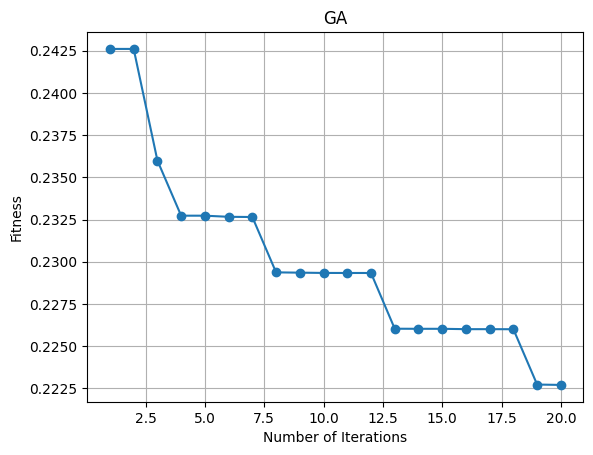

In [58]:
import numpy as np
from numpy.random import rand
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']

    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug
    # Training
    mdl1     = KNeighborsClassifier(n_neighbors = k)
    mdl1.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl1.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc

    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)

    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()

    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0

    return Xbin


def roulette_wheel(prob):
    num = len(prob)
    C   = np.cumsum(prob)
    P   = rand()
    for i in range(num):
        if C[i] > P:
            index = i;
            break

    return index


def jfs(xtrain, ytrain, opts):
    # Parameters
    ub       = 1
    lb       = 0
    thres    = 0.5
    CR       = 0.8     # crossover rate
    MR       = 0.01    # mutation rate

    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR']
    if 'MR' in opts:
        MR   = opts['MR']

     # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')

    # Initialize position
    X     = init_position(lb, ub, N, dim)

    # Binary conversion
    X     = binary_conversion(X, thres, N, dim)

    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='int')
    fitG  = float('inf')

    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, X[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]

    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0

    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (GA):", curve[0,t])
    t += 1

    while t < max_iter:
        # Probability
        inv_fit = 1 / (1 + fit)
        prob    = inv_fit / np.sum(inv_fit)

        # Number of crossovers
        Nc = 0
        for i in range(N):
            if rand() < CR:
                Nc += 1

        x1 = np.zeros([Nc, dim], dtype='int')
        x2 = np.zeros([Nc, dim], dtype='int')
        for i in range(Nc):
            # Parent selection
            k1      = roulette_wheel(prob)
            k2      = roulette_wheel(prob)
            P1      = X[k1,:].copy()
            P2      = X[k2,:].copy()
            # Random one dimension from 1 to dim
            index   = np.random.randint(low = 1, high = dim-1)
            # Crossover
            x1[i,:] = np.concatenate((P1[0:index] , P2[index:]))
            x2[i,:] = np.concatenate((P2[0:index] , P1[index:]))
            # Mutation
            for d in range(dim):
                if rand() < MR:
                    x1[i,d] = 1 - x1[i,d]

                if rand() < MR:
                    x2[i,d] = 1 - x2[i,d]


        # Merge two group into one
        Xnew = np.concatenate((x1 , x2), axis=0)

        # Fitness
        Fnew = np.zeros([2 * Nc, 1], dtype='float')
        for i in range(2 * Nc):
            Fnew[i,0] = Fun(xtrain, ytrain, Xnew[i,:], opts)
            if Fnew[i,0] < fitG:
                Xgb[0,:] = Xnew[i,:]
                fitG     = Fnew[i,0]

        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (GA):", curve[0,t])
        t += 1

        # Elitism
        XX  = np.concatenate((X , Xnew), axis=0)
        FF  = np.concatenate((fit , Fnew), axis=0)
        # Sort in ascending order
        ind = np.argsort(FF, axis=0)
        for i in range(N):
            X[i,:]   = XX[ind[i,0],:]
            fit[i,0] = FF[ind[i,0]]


    # Best feature subset
    Gbin       = Xgb[0,:]
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    ga_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}

    return ga_data



# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(data[:, -1])

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state = 42)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 20   # maximum number of generations
CR   = 0.8
MR   = 0.01
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl1       = KNeighborsClassifier(n_neighbors = k)
mdl1.fit(x_train, y_train)

# accuracy
y_pred    = mdl1.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
GA_acc = "Accuracy:", 100 * Acc
print(*GA_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('GA')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of GA-KNN

In [60]:
from sklearn.metrics import precision_score
GA_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(GA_prec)
from sklearn.metrics import recall_score
GA_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(GA_rec)
from sklearn.metrics import f1_score
GA_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(GA_f1)

Precision: 0.740
Recall: 0.780
F1 Score: 0.702


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Confusion Matrix**

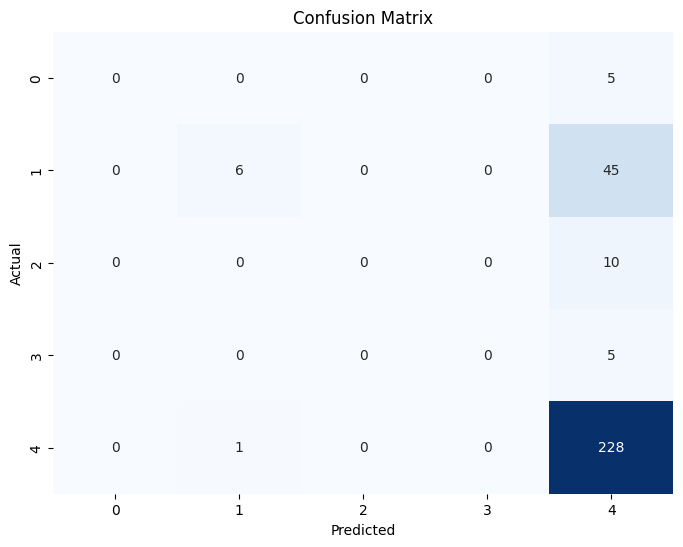

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [62]:
import joblib

# Save the trained model
joblib.dump(mdl1, 'Bug_Hierachy_model_ga.pkl')
print("Model saved successfully!")

Model saved successfully!


## Particle Swarm Optimization with KNN

Iteration: 1
Best (PSO): 0.2294028682059372
Iteration: 2
Best (PSO): 0.2294028682059372
Iteration: 3
Best (PSO): 0.2294028682059372
Iteration: 4
Best (PSO): 0.22592647354080028
Iteration: 5
Best (PSO): 0.22592647354080028
Iteration: 6
Best (PSO): 0.22592647354080028
Iteration: 7
Best (PSO): 0.22592647354080028
Iteration: 8
Best (PSO): 0.22592647354080028
Iteration: 9
Best (PSO): 0.22275410870500498
Iteration: 10
Best (PSO): 0.22275410870500498
Iteration: 11
Best (PSO): 0.22275410870500498
Iteration: 12
Best (PSO): 0.22275410870500498
Iteration: 13
Best (PSO): 0.22275410870500498
Iteration: 14
Best (PSO): 0.22275410870500498
Iteration: 15
Best (PSO): 0.22275410870500498
Iteration: 16
Best (PSO): 0.22275410870500498
Iteration: 17
Best (PSO): 0.22275410870500498
Iteration: 18
Best (PSO): 0.22275410870500498
Iteration: 19
Best (PSO): 0.22275410870500498
Iteration: 20
Best (PSO): 0.22275410870500498
Accuracy: 78.0
Feature Size: 6909


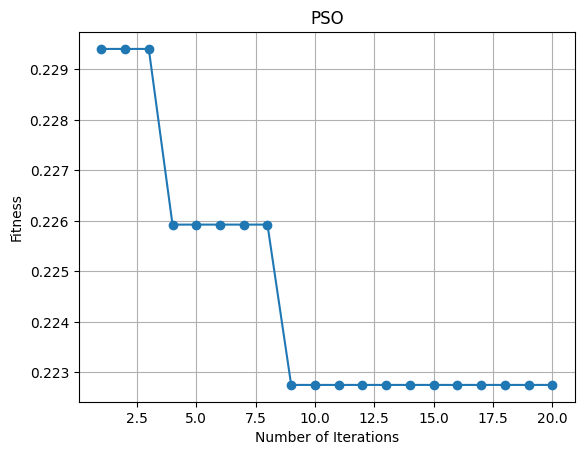

In [44]:
import numpy as np
from numpy.random import rand

# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']

    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc

    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)

    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()

    return X


def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]

    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()

    return V, Vmax, Vmin


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0

    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub

    return x


def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor

    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2']

    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')

    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim)

    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0

    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)

        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]

        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1

        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d])
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])


    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim)
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}

    return pso_data


import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 20   # maximum number of iterations
w    = 0.9
c1   = 2
c2   = 2
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k)
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
PSO_acc = "Accuracy:", 100 * Acc
print(*PSO_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of PSO-KNN

In [45]:
from sklearn.metrics import precision_score
PSO_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(PSO_prec)
from sklearn.metrics import recall_score
PSO_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(PSO_prec)
from sklearn.metrics import f1_score
PSO_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(PSO_f1)

Precision: 0.749
Precision: 0.749
F1 Score: 0.687


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


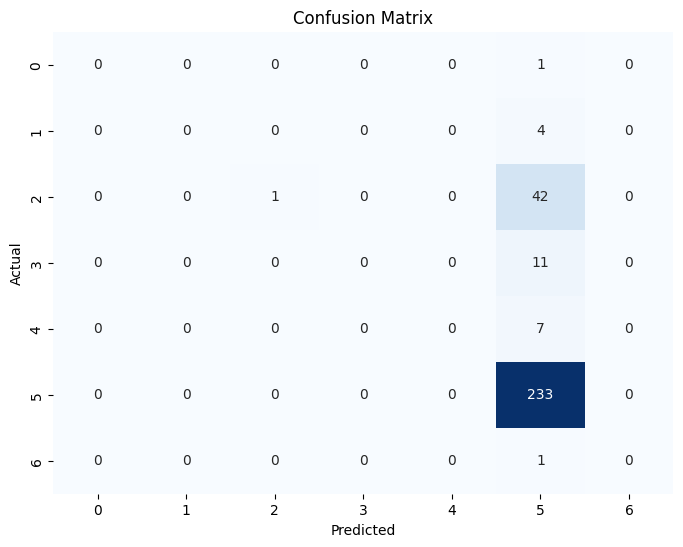

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Only KNN

In [47]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(xtrain, ytrain)
y_pred_5 = knn5.predict(xtest)
from sklearn.metrics import accuracy_score
KNN_acc = "Accuracy: ", accuracy_score(ytest, y_pred_5)*100
print(*KNN_acc)

Accuracy:  73.66666666666667


## Precision, Recall and F1-Score of only KNN

In [48]:
from sklearn.metrics import precision_score
KNN_prec = 'Precision: %.3f' % precision_score(ytest, y_pred_5, average='weighted')
print(KNN_prec)
from sklearn.metrics import recall_score
KNN_rec = 'Recall: %.3f' % recall_score(ytest, y_pred_5, average = 'weighted')
print(KNN_rec)
from sklearn.metrics import f1_score
KNN_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred_5, average = 'weighted')
print(KNN_f1)

Precision: 0.649
Recall: 0.737
F1 Score: 0.686


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
from tabulate import tabulate
mydata = [["KNN", KNN_prec, KNN_rec, KNN_f1, KNN_acc],["PSO-KNN", PSO_prec, PSO_rec, PSO_f1, PSO_acc],["GA-KNN", GA_prec, GA_rec, GA_f1, GA_acc]]
# create header
head = ["Algorithm", "Precision_Score", "Recall_Score", "F1_Score", "Accuracy_Score"]
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------+-------------------+----------------+-----------------+-----------------------------------+
| Algorithm   | Precision_Score   | Recall_Score   | F1_Score        | Accuracy_Score                    |
+=============+===================+================+=================+===================================+
| KNN         | Precision: 0.649  | Recall: 0.737  | F1 Score: 0.686 | ('Accuracy: ', 73.66666666666667) |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
| PSO-KNN     | Precision: 0.749  | Recall: 0.780  | F1 Score: 0.687 | ('Accuracy:', 78.0)               |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
| GA-KNN      | Precision: 0.740  | Recall: 0.780  | F1 Score: 0.702 | ('Accuracy:', 78.0)               |
+-------------+-------------------+----------------+-----------------+-----------------------------------+


### Saving the Model

In [ ]:
import joblib

# Save the trained model
joblib.dump(mdl, 'Bug_Hierachy_model_pso.pkl')
print("Model saved successfully!")


Model saved successfully!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
